In [95]:
import numpy as np
import pandas as pd


In [96]:
df=pd.read_csv('dataset 1.csv')

In [97]:
df.drop('Day',axis=1,inplace=True)

In [98]:
df.head()

,Outlook,Temperature,Humidity,Wind,Tennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Medium,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes


In [99]:
def calculate_entropy_dataset(data):
    target=data.iloc[:,-1].values
    _, counts = np.unique(target, return_counts=True)
    probabilities = counts / counts.sum()
    entropy = sum(probabilities * -np.log2(probabilities))
    return entropy
    

In [100]:
calculate_entropy_dataset(df)

0.9402859586706311

In [101]:
def calculate_entropy_column(data):
    columns=data.iloc[:,:]
    n_columns=columns.shape[1]
    entropies=[]
    prob=[]
    for i in range(n_columns):
        column=columns.iloc[:,i].values
        #print(column)
        _, counts = np.unique(column, return_counts=True)
        probabilities = counts / counts.sum()
        prob.append(probabilities)
        entropy = sum(probabilities * -np.log2(probabilities))
        entropies.append(entropy)   
    return entropies,prob

In [102]:
entropies,prob=calculate_entropy_column(df)

In [103]:
entropies
#Entropies of all remaining column

[1.5774062828523454,
 1.5566567074628228,
 1.0,
 0.9852281360342515,
 0.9402859586706311]

In [104]:
prob

[array([0.28571429, 0.35714286, 0.35714286]),
 array([0.28571429, 0.28571429, 0.42857143]),
 array([0.5, 0.5]),
 array([0.42857143, 0.57142857]),
 array([0.35714286, 0.64285714])]

In [105]:
whole_dataset= calculate_entropy_dataset(df)

In [106]:
def calculate_gain(all_entropies, total_entropy):
    gain=[total_entropy-g for g in all_entropies]
    del gain[-1]
    return gain

In [107]:
gains=calculate_gain(entropies,whole_dataset)

In [108]:
gains

[-0.6371203241817143,
 -0.6163707487921917,
 -0.05971404132936886,
 -0.044942177363620384]

In [119]:
def calculate_entropy_dataset(data):
    target=data.iloc[:,-1].values
    _, counts = np.unique(target, return_counts=True)
    probabilities = counts / counts.sum()
    entropy = sum(probabilities * -np.log2(probabilities))
    return entropy
def calculate_entropy_column(data):
    columns=data.iloc[:,:]
    n_columns=columns.shape[1]
    entropies=[]
    prob=[]
    for i in range(n_columns):
        column=columns.iloc[:,i].values
        #print(column)
        _, counts = np.unique(column, return_counts=True)
        probabilities = counts / counts.sum()
        prob.append(probabilities)
        entropy = sum(probabilities * -np.log2(probabilities))
        entropies.append(entropy)   
    return entropies,prob
def calculate_gain(all_entropies, total_entropy):
    gain=[total_entropy-g for g in all_entropies[:-1]]
    return gain
def id3_algorithm(data):

    whole_dataset_entropy = calculate_entropy_dataset(data)
    entropies, prob = calculate_entropy_column(data)
    gains = calculate_gain(entropies, whole_dataset_entropy)
    best_feature_index = np.argmax(gains)
    best_feature_entropy = entropies[best_feature_index]
    best_feature_values = data.iloc[:, best_feature_index].unique()

    # Construct the decision tree node
    node = {
        'feature_index': best_feature_index,
        'feature_entropy': best_feature_entropy,
        'feature_values': best_feature_values,
        'subtrees': {}
    }

    for value in best_feature_values:
        subset = data[data.iloc[:, best_feature_index] == value]
        if subset.empty:
            node['subtrees'][value] = "Leaf Node: No Data"
        elif calculate_entropy_dataset(subset) == 0:
            node['subtrees'][value] = subset.iloc[0, -1]
        else:
            subset = subset.drop(columns=data.columns[best_feature_index])
            node['subtrees'][value] = id3_algorithm(subset)

    return node


In [122]:
def predict(tree, sample):
    current_node = tre

    while True:
        if isinstance(current_node, dict):
            feature_index = current_node['feature_index']
            feature_value = sample.iloc[feature_index]
            
            if feature_value in current_node['subtrees']:
                current_node = current_node['subtrees'][feature_value]
            else:
                # If the feature value is not present in the subtree, return a default value or handle as needed
                return "Unknown"
        else:
            # Leaf node reached, return the predicted target value
            return current_node


In [128]:
data=np.array(df)

In [136]:
test=df.iloc[2,:]
prediction = predict(tree, test)
print("Predicted value:", prediction)


Predicted value: Yes


In [131]:
test

0        Hot
1        Hot
2        Hot
3     Medium
4       Cool
5       Cool
6       Cool
7     Medium
8       Cool
9     Medium
10    Medium
11    Medium
12       Hot
13    Medium
Name: Temperature, dtype: object

In [120]:
tree = id3_algorithm(df)
print(tree)


{'feature_index': 3, 'feature_entropy': 0.9852281360342515, 'feature_values': array(['Weak', 'Strong'], dtype=object), 'subtrees': {'Weak': {'feature_index': 2, 'feature_entropy': 1.0, 'feature_values': array(['High', 'Normal'], dtype=object), 'subtrees': {'High': {'feature_index': 1, 'feature_entropy': 1.0, 'feature_values': array(['Hot', 'Medium'], dtype=object), 'subtrees': {'Hot': {'feature_index': 0, 'feature_entropy': 1.0, 'feature_values': array(['Sunny', 'Overcast'], dtype=object), 'subtrees': {'Sunny': 'No', 'Overcast': 'Yes'}}, 'Medium': {'feature_index': 0, 'feature_entropy': 1.0, 'feature_values': array(['Rain', 'Sunny'], dtype=object), 'subtrees': {'Rain': 'Yes', 'Sunny': 'No'}}}}, 'Normal': 'Yes'}}, 'Strong': {'feature_index': 2, 'feature_entropy': 1.0, 'feature_values': array(['High', 'Normal'], dtype=object), 'subtrees': {'High': {'feature_index': 1, 'feature_entropy': 0.9182958340544896, 'feature_values': array(['Hot', 'Medium'], dtype=object), 'subtrees': {'Hot': 'No'

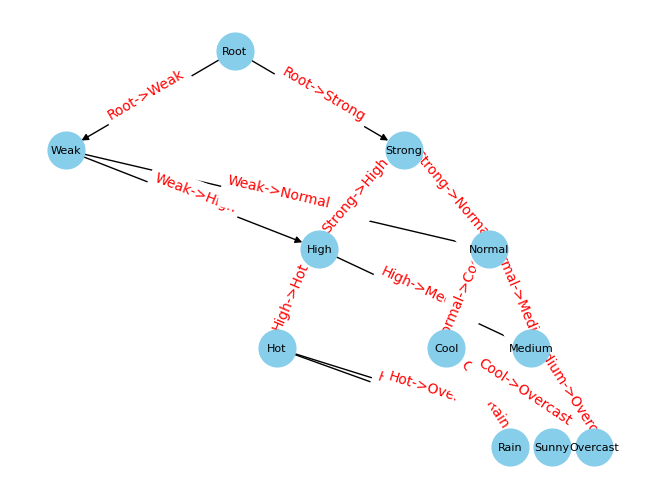

In [121]:
import matplotlib.pyplot as plt
import networkx as nx

def visualize_tree(tree, parent_name, graph, pos=None, level=0, width=2., vert_gap=0.4, xcenter=0.5):
    if pos is None:
        pos = {parent_name: (xcenter, 1 - level * vert_gap)}
    else:
        pos[parent_name] = (xcenter, 1 - level * vert_gap)
    neighbors = list(graph.neighbors(parent_name))
    if len(neighbors) != 0:
        dx = width / 2
        nextx = xcenter - width/2 - dx/2
        for neighbor in neighbors:
            nextx += dx
            pos = visualize_tree(tree, neighbor, graph=graph, pos=pos,
                                level=level+1, width=dx, xcenter=nextx)
    return pos

def add_edges(node, parent_name, graph, pos=None, level=0, width=2., vert_gap=0.4, xcenter=0.5):
    graph.add_node(parent_name)
    if pos is None:
        pos = {parent_name: (xcenter, 1 - level * vert_gap)}
    else:
        pos[parent_name] = (xcenter, 1 - level * vert_gap)

    if 'subtrees' in node and isinstance(node['subtrees'], dict):
        neighbors = node['subtrees'].keys()
        if len(neighbors) != 0:
            dx = width / 2
            nextx = xcenter - width/2 - dx/2
            for neighbor in neighbors:
                nextx += dx
                graph.add_edge(parent_name, neighbor)
                pos = add_edges(node['subtrees'][neighbor], neighbor, graph=graph, pos=pos,
                                level=level+1, width=dx, xcenter=nextx)
    return pos

def draw_tree(tree):
    graph = nx.DiGraph()
    
    pos = add_edges(tree, "Root", graph=graph)
    pos = visualize_tree(tree, "Root", graph=graph, pos=pos)

    labels = nx.get_edge_attributes(graph, 'label')
    edge_labels = {(parent, child): f'{parent}->{child}\n{labels.get((parent, child), "")}' for parent, child in graph.edges()}

    nx.draw(graph, pos=pos, with_labels=True, node_size=700, node_color='skyblue', font_size=8, font_color='black')
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_color='red')
    plt.show()

# Assuming 'tree' is the decision tree generated using id3_algorithm
draw_tree(tree)

